In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import statsmodels.api as sm
from scipy import stats

In [4]:
os.chdir('/Users/alisdghnia/Desktop/Research Datasets/')

In [5]:
df = pd.read_csv('names-mc-volume.csv')
df_1 = pd.read_csv('technical-terms-top-29.csv')

In [6]:
all_df = pd.merge(df, df_1, left_on = 'Name', right_on = 'Unnamed: 0')

In [7]:
all_df = all_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [8]:
all_df = all_df[np.log10(all_df.market_cap) >= 1]
all_df

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Name,market_cap,volume_y,blockchain,smart contract,proof work,proofofwork,pow,proof stake,proofofstake,...,zero knowledge proof,multisignature architecture,multi signature architecture,multiparty computation,mpc,multi party computation,privacy preserving protocols,privacypreserving protocols,decentralized applications,dapps
1,Neural Protocol - Whitepaper,1.074150e+05,0.000000e+00,0.000615,0.000307,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Idena - Whitepaper,7.561350e+05,2.432000e+04,0.000530,0.000000,0.0,0.0,0.000235,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0chain - Whitepaper,8.702623e+06,9.034700e+04,0.001095,0.000360,0.0,0.0,0.000030,0.0,0.000045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000060
7,SmartMesh - Whitepaper,1.243439e+06,5.655200e+04,0.001014,0.000000,0.0,0.0,0.000078,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,0.000000
9,Evedo - Whitepaper,1.834120e+05,6.310600e+04,0.000286,0.000261,0.0,0.0,0.000025,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,ZClassic - Whitepaper,3.467130e+05,2.500000e+01,0.000042,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1693,Celo Dollar - Whitepaper,4.588473e+07,4.392350e+05,0.000068,0.000158,0.0,0.0,0.000113,0.0,0.000045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000023
1694,Everex - Whitepaper,2.119030e+05,2.759000e+03,0.000804,0.000262,0.0,0.0,0.000017,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1695,Cartesi - Whitepaper,6.410724e+07,4.180223e+06,0.001118,0.000219,0.0,0.0,0.000196,0.0,0.000000,...,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.000231


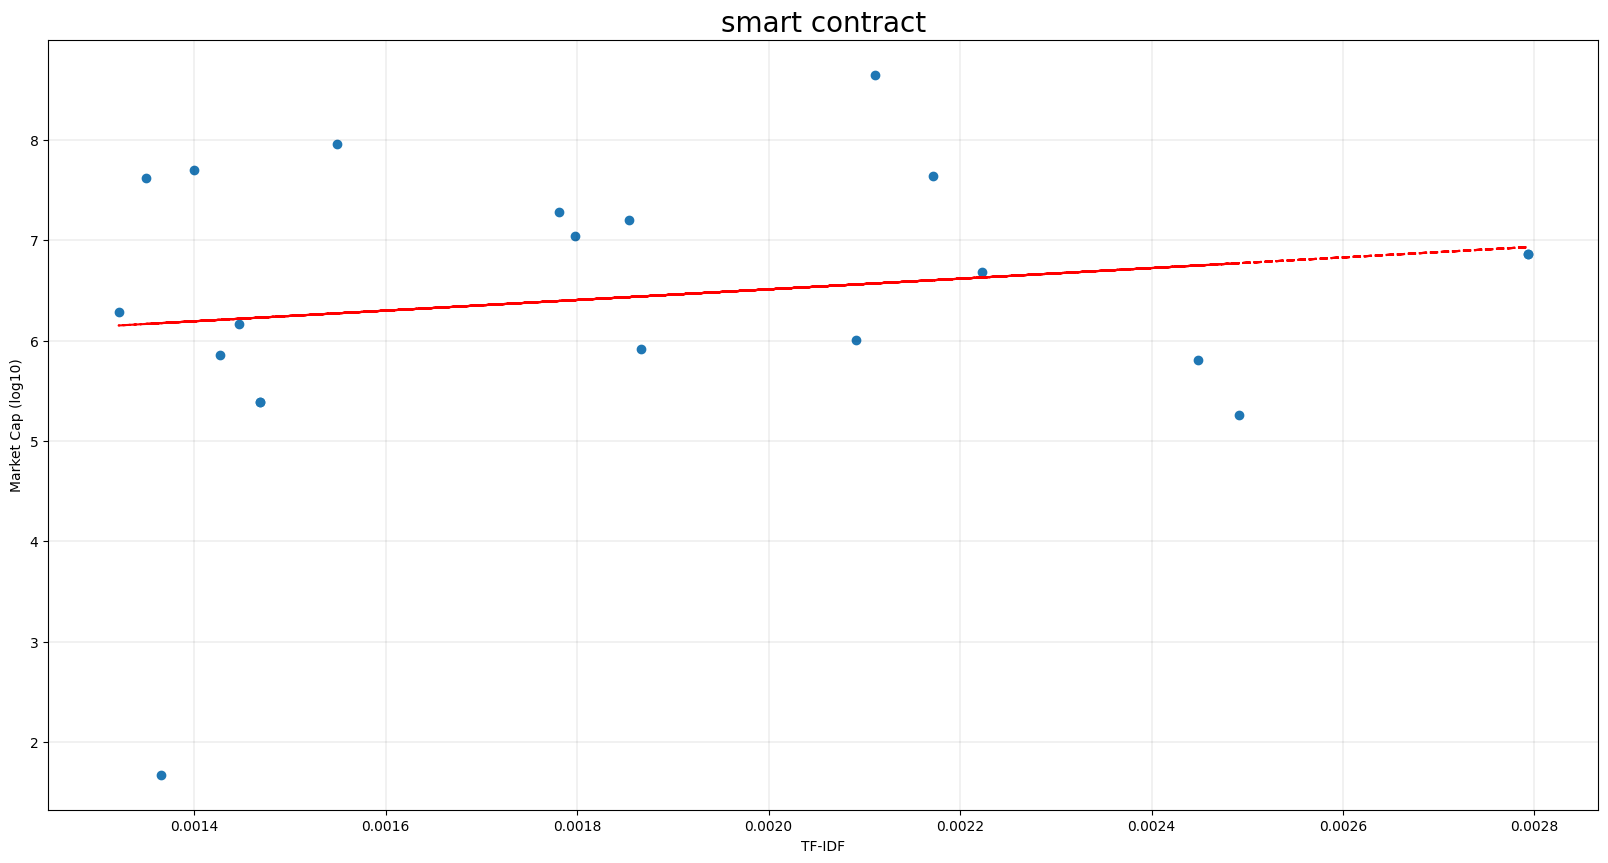

In [9]:
top_2 = all_df['smart contract'].quantile(0.98)
top_df = all_df[all_df['smart contract'] > top_2]
fig = plt.figure(figsize=(20,10))
fig.add_subplot(111)

x = top_df['smart contract']
y=np.log10(top_df.market_cap)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y)

plt.title('smart contract', fontsize = 20)
plt.xlabel('TF-IDF')
plt.ylabel('Market Cap (log10)')

plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(color='black', linestyle='-', linewidth=0.08)
plt.plot(x,p(x),"r--")

# plt.xticks([0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008])
# plt.hlines(y = 5, xmin = 0, xmax = 13, colors= 'black')
# plt.vlines(x = 5, ymin = 0, ymax = 13, colors= 'black')
plt.show()

In [10]:
all_df.columns[3:]

Index(['blockchain', 'smart contract', 'proof work', 'proofofwork', 'pow',
       'proof stake', 'proofofstake', 'pos', 'multisig', 'hash rate',
       'merkle tree', 'side chain', 'multicoin wallet', 'multisig wallet',
       'delegated proof stake', 'delegated pos', 'artificial intelligence',
       'machine learning', 'zeroknowledge proof', 'zero knowledge proof',
       'multisignature architecture', 'multi signature architecture',
       'multiparty computation', 'mpc', 'multi party computation',
       'privacy preserving protocols', 'privacypreserving protocols',
       'decentralized applications', 'dapps'],
      dtype='object')

In [15]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(all_df.iloc[:, 3:])
scaled_values

array([[-0.17312025,  0.17799874,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214],
       [-0.30396121, -0.70619233,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214],
       [ 0.56320568,  0.32896207,  0.        , ...,  0.        ,
        -0.29416696,  0.09615249],
       ...,
       [ 0.11732645,  0.04798564,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214],
       [ 0.59894688, -0.07633449,  0.        , ...,  0.        ,
         0.77949876,  1.01674221],
       [ 0.82111565, -0.63206914,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214]])

In [11]:
normalizer = Normalizer()
scaled_values = normalizer.fit_transform(all_df.iloc[:, 3:])
scaled_values

array([[0.8       , 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.60955692, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.86031325, 0.28284271, 0.        , ..., 0.        , 0.        ,
        0.04714045],
       ...,
       [0.83677867, 0.27286261, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70350834, 0.1378006 , 0.        , ..., 0.        , 0.02175799,
        0.14505327],
       [0.91624805, 0.01869894, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
all_df.iloc[:, 3:] = scaled_values
all_df

,Name,market_cap,volume_y,blockchain,smart contract,proof work,proofofwork,pow,proof stake,proofofstake,...,zero knowledge proof,multisignature architecture,multi signature architecture,multiparty computation,mpc,multi party computation,privacy preserving protocols,privacypreserving protocols,decentralized applications,dapps
1,Neural Protocol - Whitepaper,1.074150e+05,0.000000e+00,0.800000,0.400000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Idena - Whitepaper,7.561350e+05,2.432000e+04,0.609557,0.000000,0.0,0.0,0.270914,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0chain - Whitepaper,8.702623e+06,9.034700e+04,0.860313,0.282843,0.0,0.0,0.023570,0.0,0.035355,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.047140
7,SmartMesh - Whitepaper,1.243439e+06,5.655200e+04,0.904656,0.000000,0.0,0.0,0.069589,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034794,0.000000
9,Evedo - Whitepaper,1.834120e+05,6.310600e+04,0.432885,0.395243,0.0,0.0,0.037642,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,ZClassic - Whitepaper,3.467130e+05,2.500000e+01,0.075617,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1693,Celo Dollar - Whitepaper,4.588473e+07,4.392350e+05,0.080178,0.187083,0.0,0.0,0.133631,0.0,0.053452,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.026726
1694,Everex - Whitepaper,2.119030e+05,2.759000e+03,0.836779,0.272863,0.0,0.0,0.018191,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1695,Cartesi - Whitepaper,6.410724e+07,4.180223e+06,0.703508,0.137801,0.0,0.0,0.123295,0.0,0.000000,...,0.007253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021758,0.145053


# Graphs

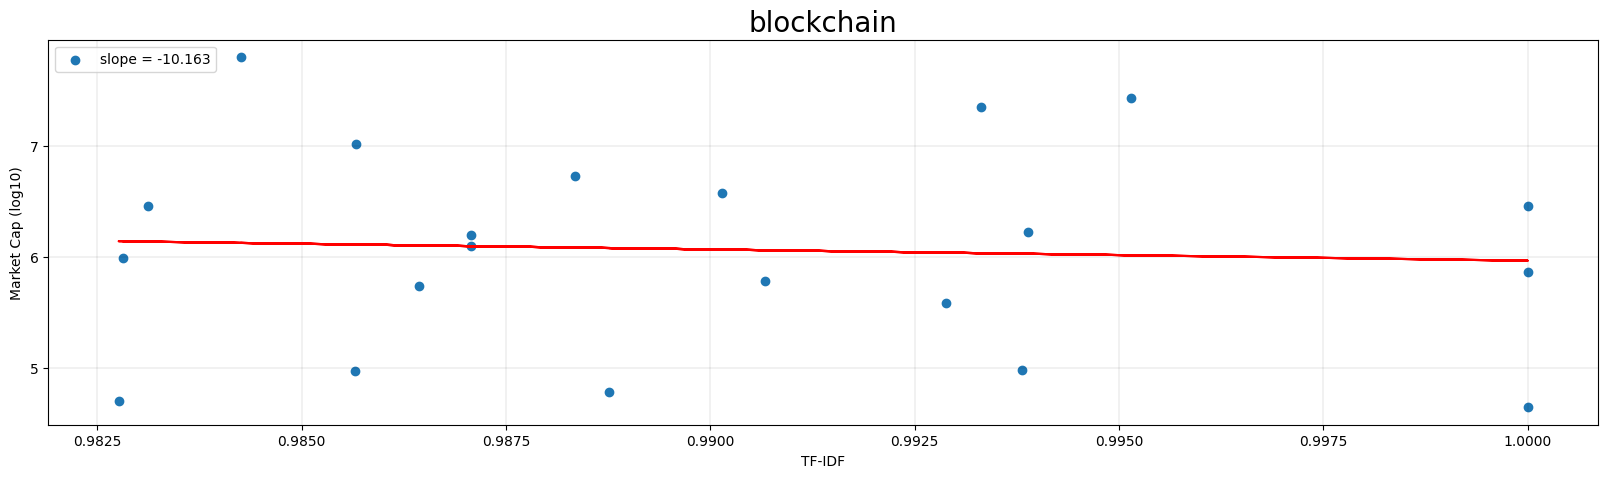

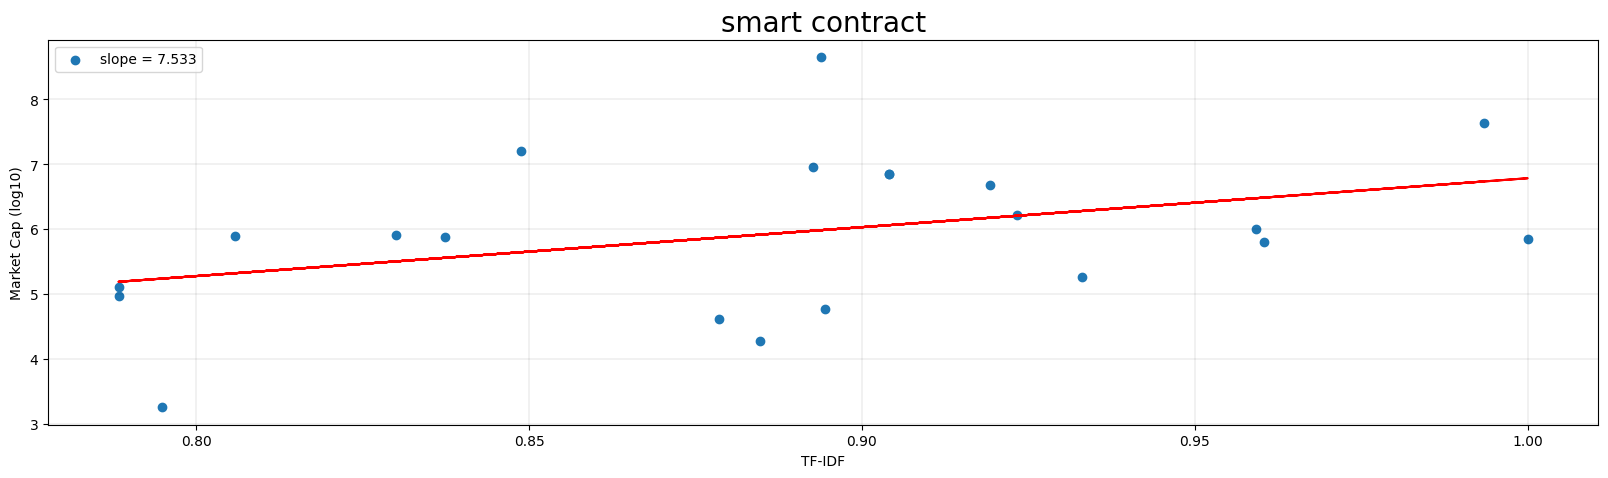

proof work is not good for visualization


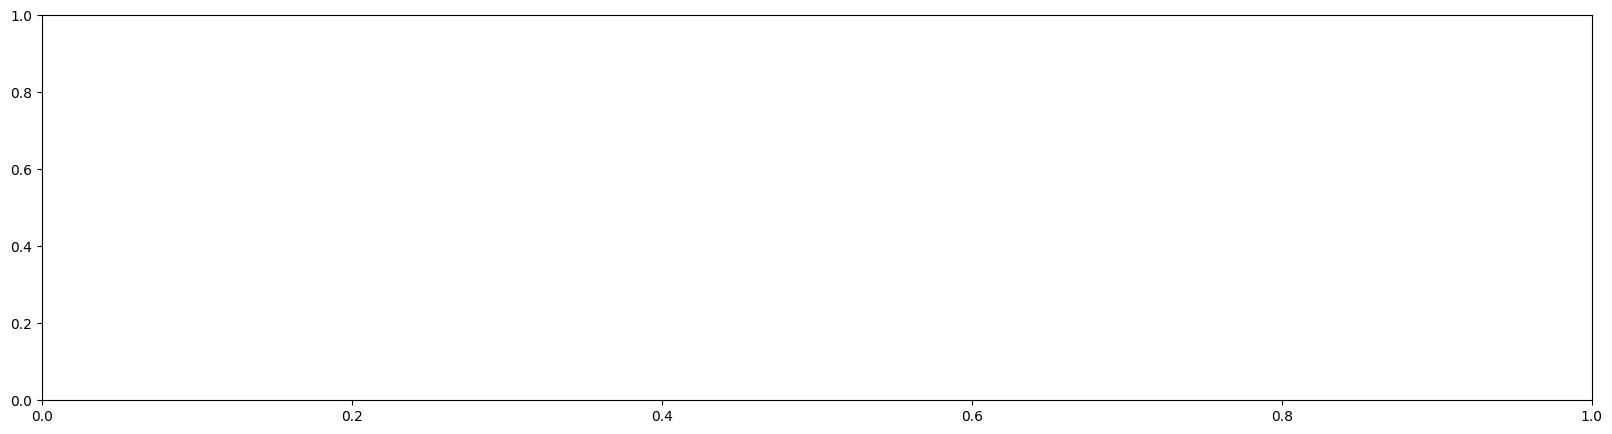

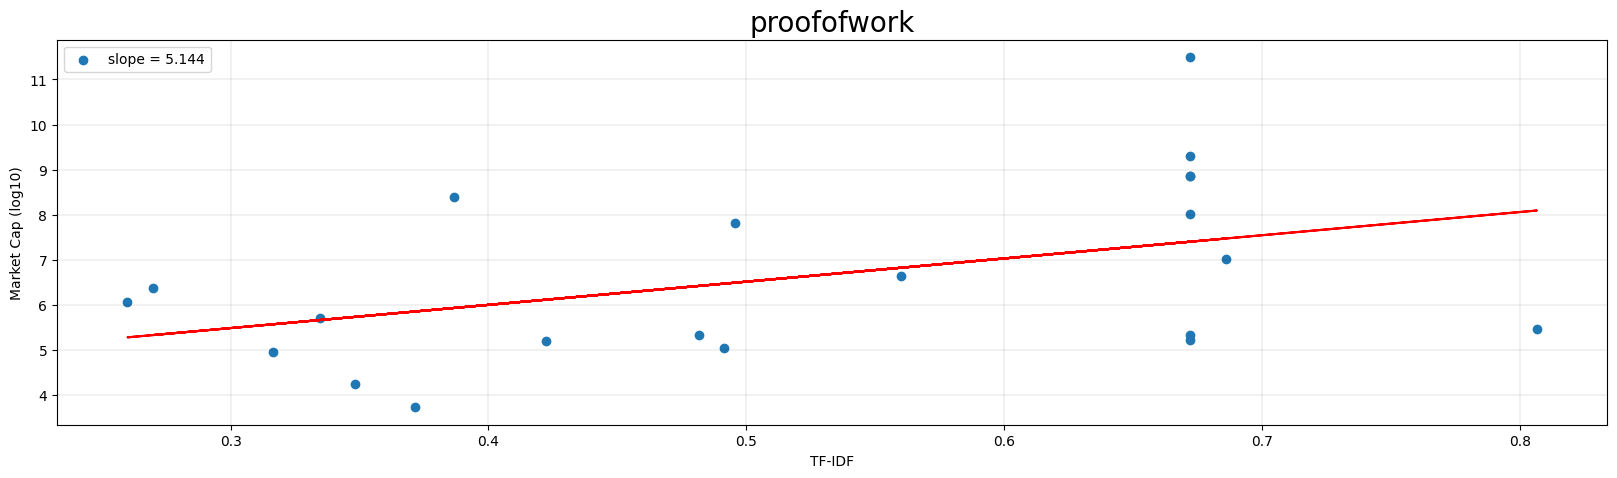

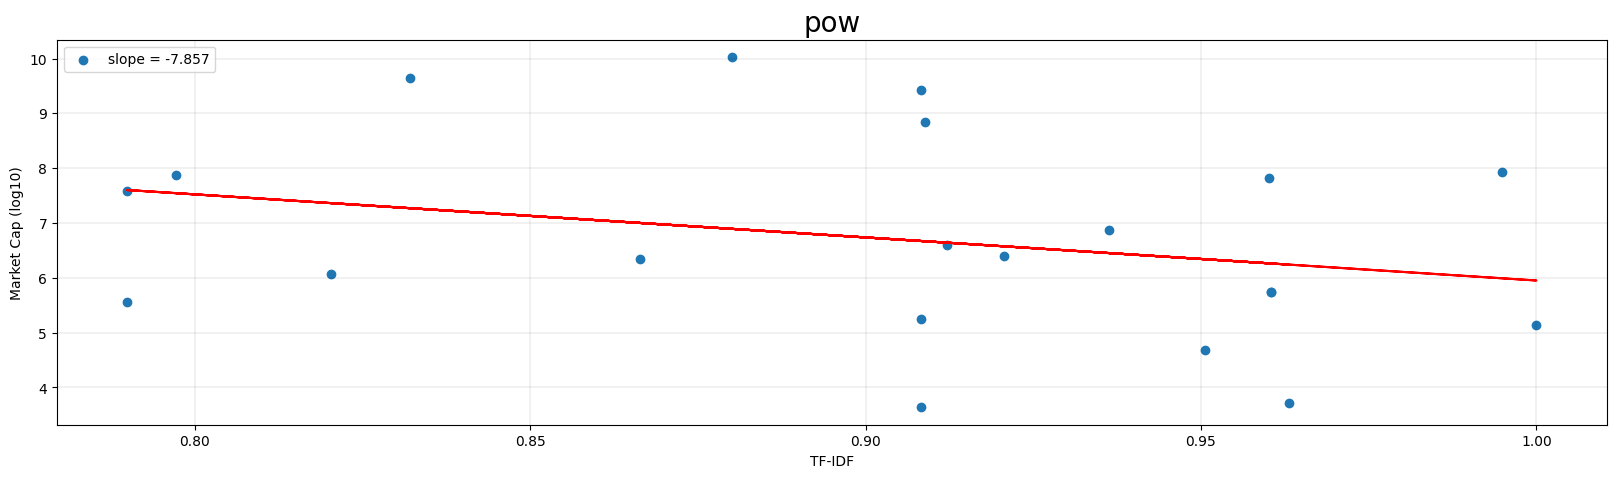

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


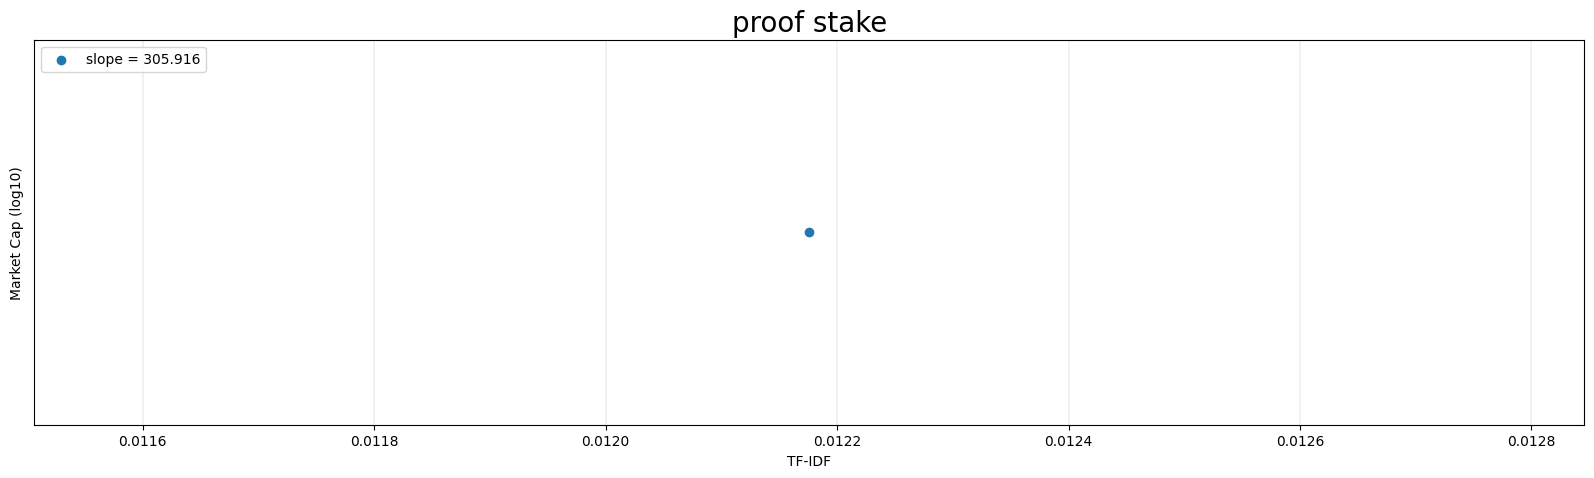

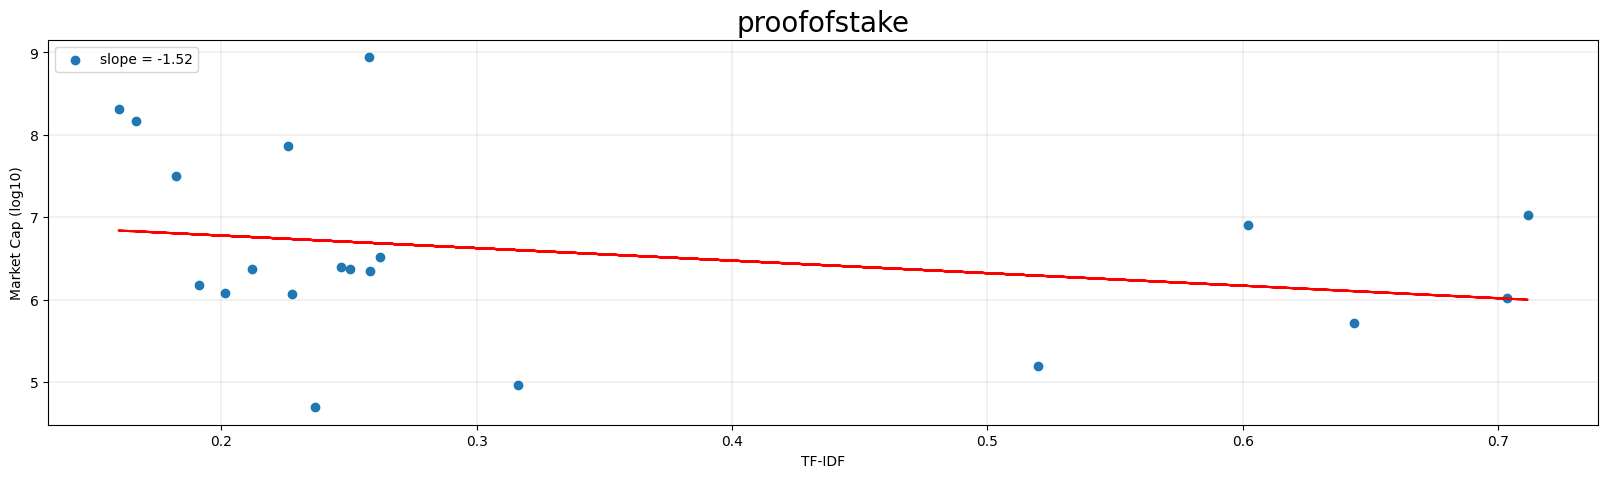

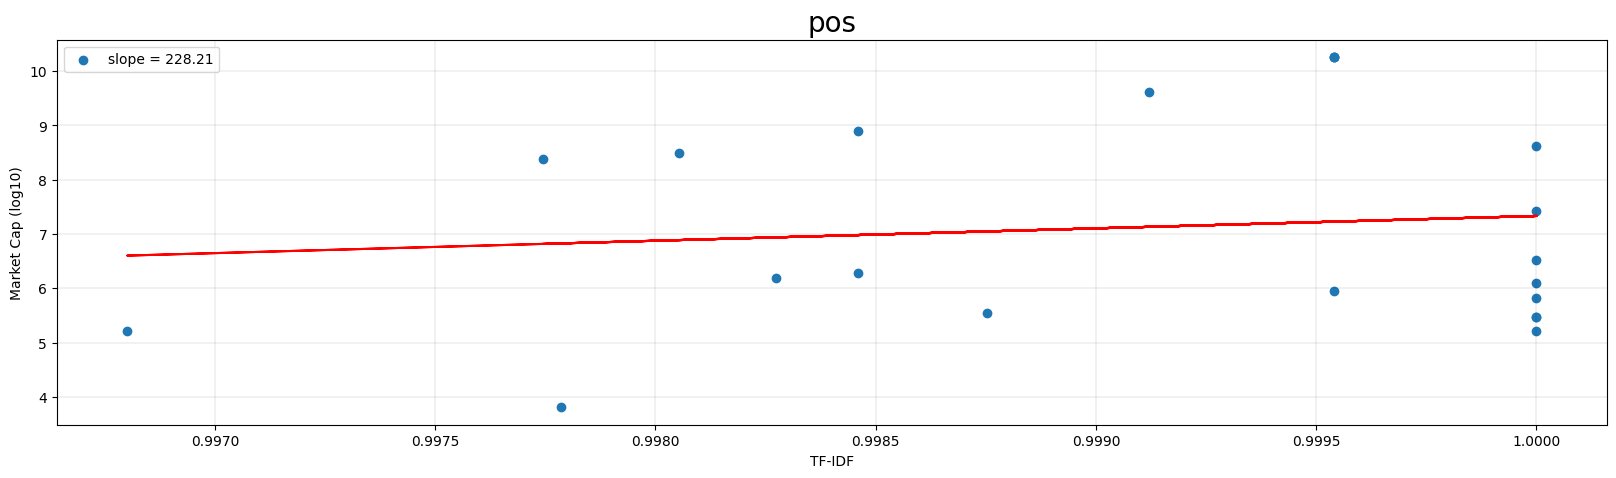

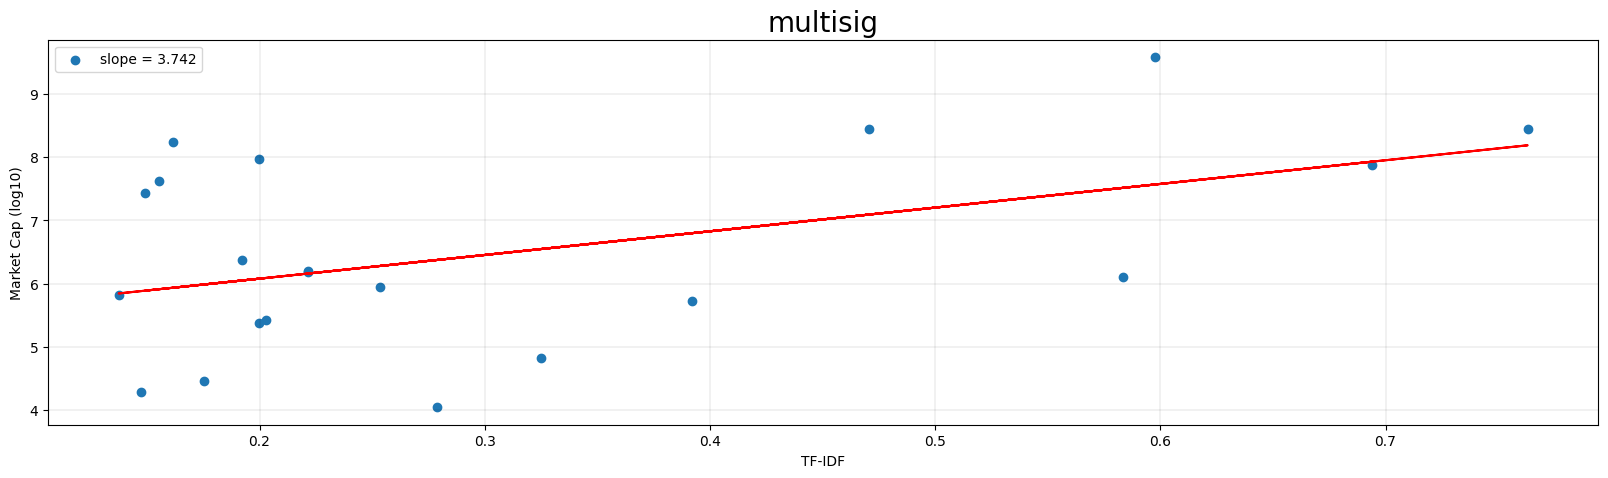

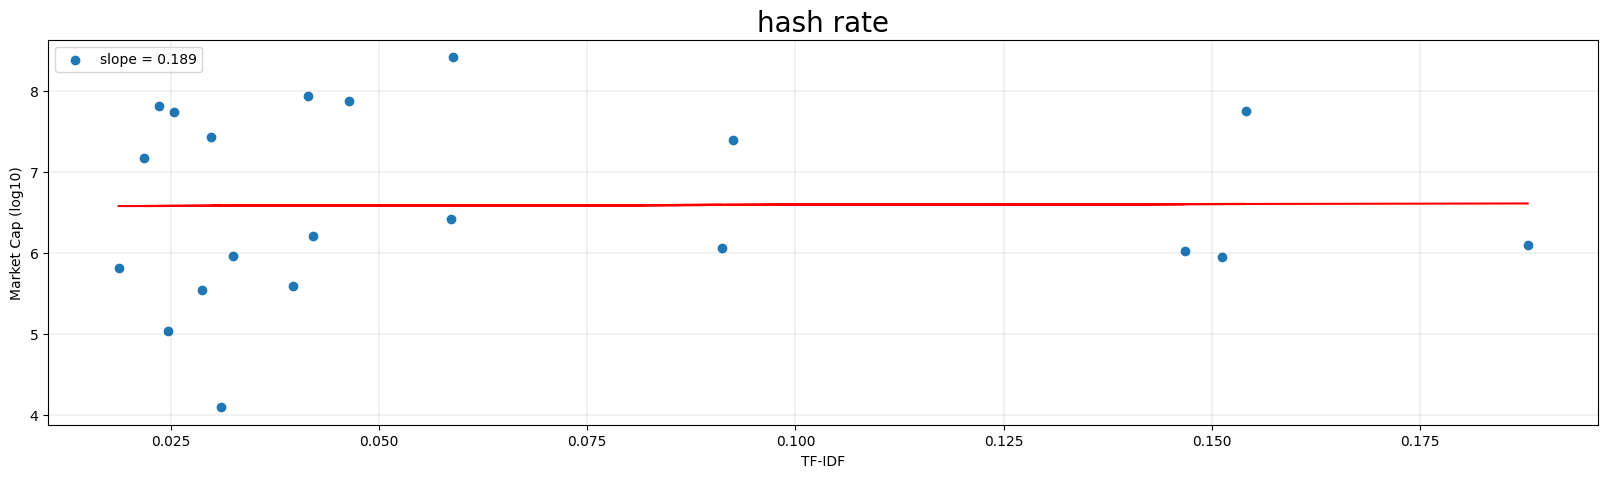

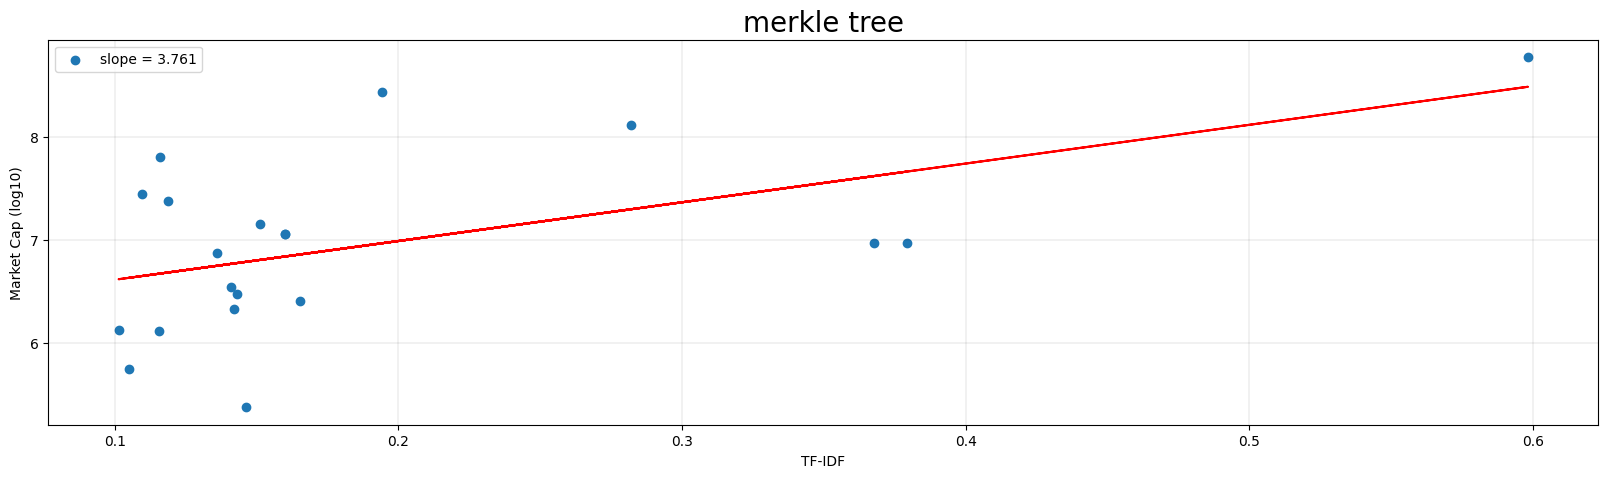

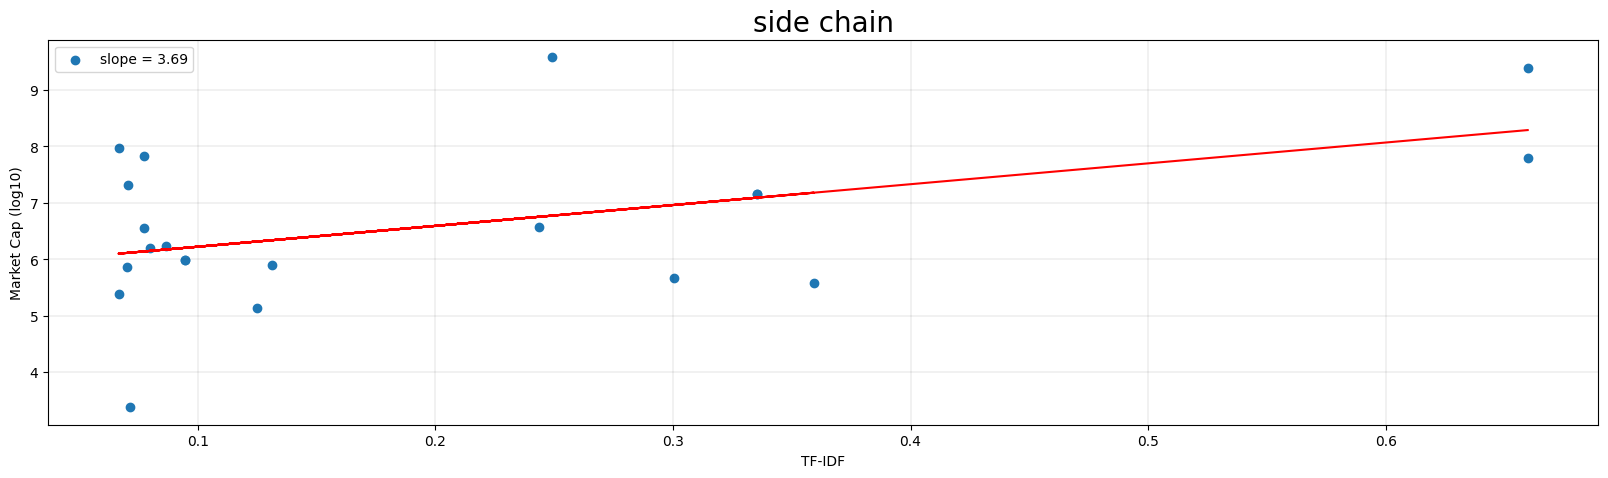

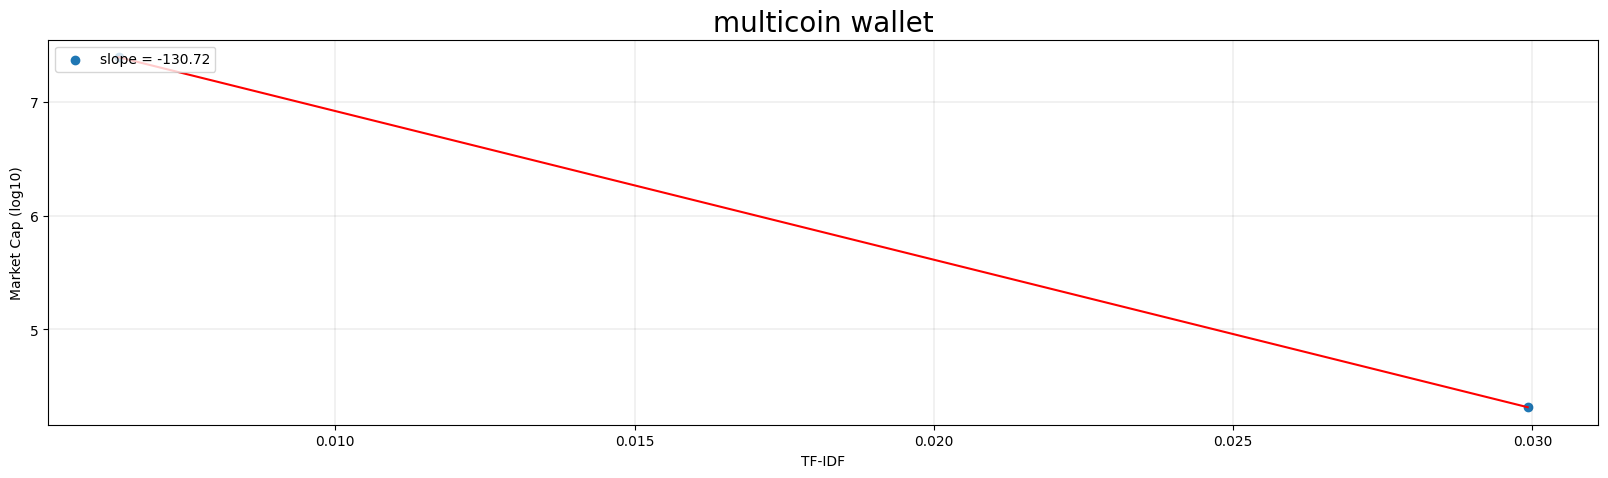

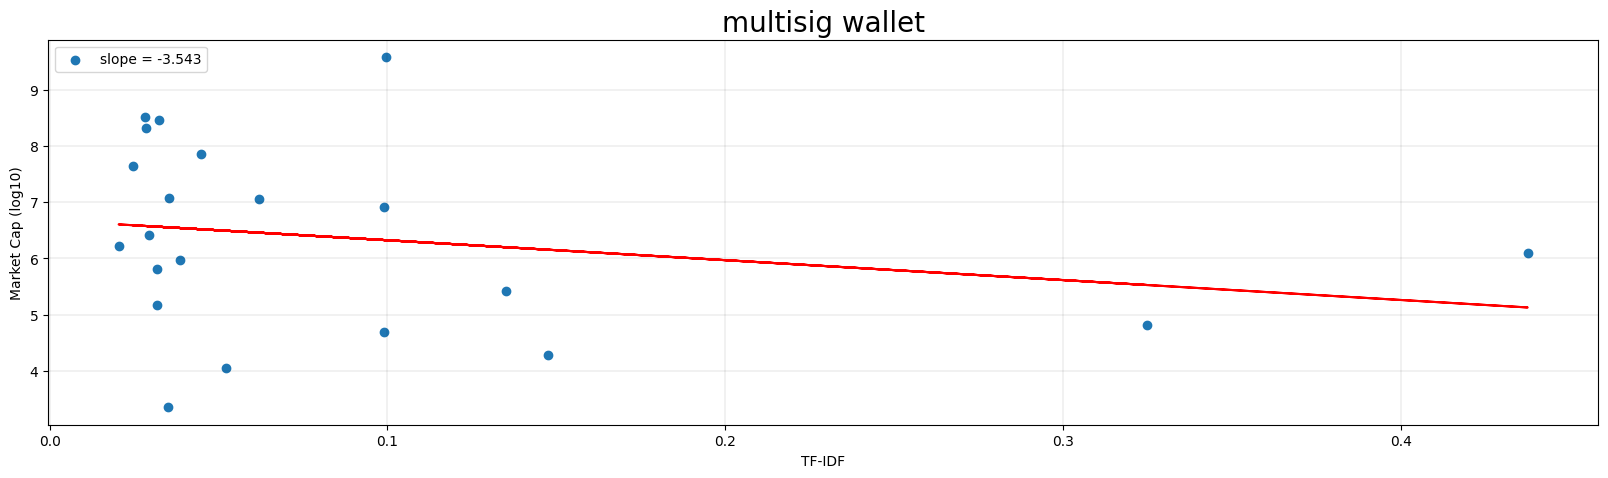

delegated proof stake is not good for visualization


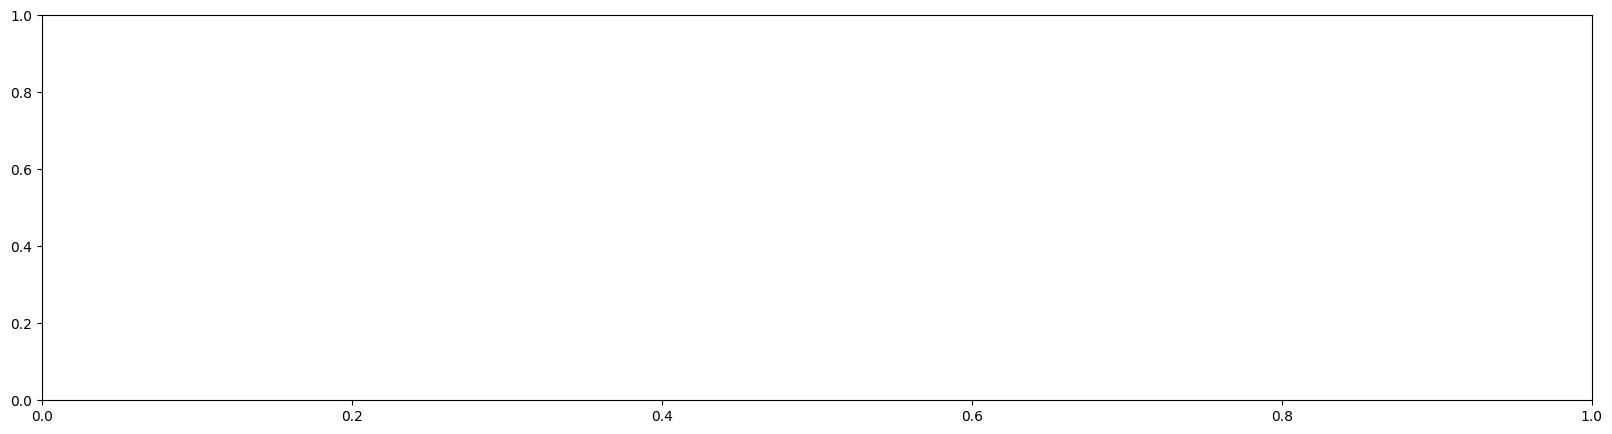

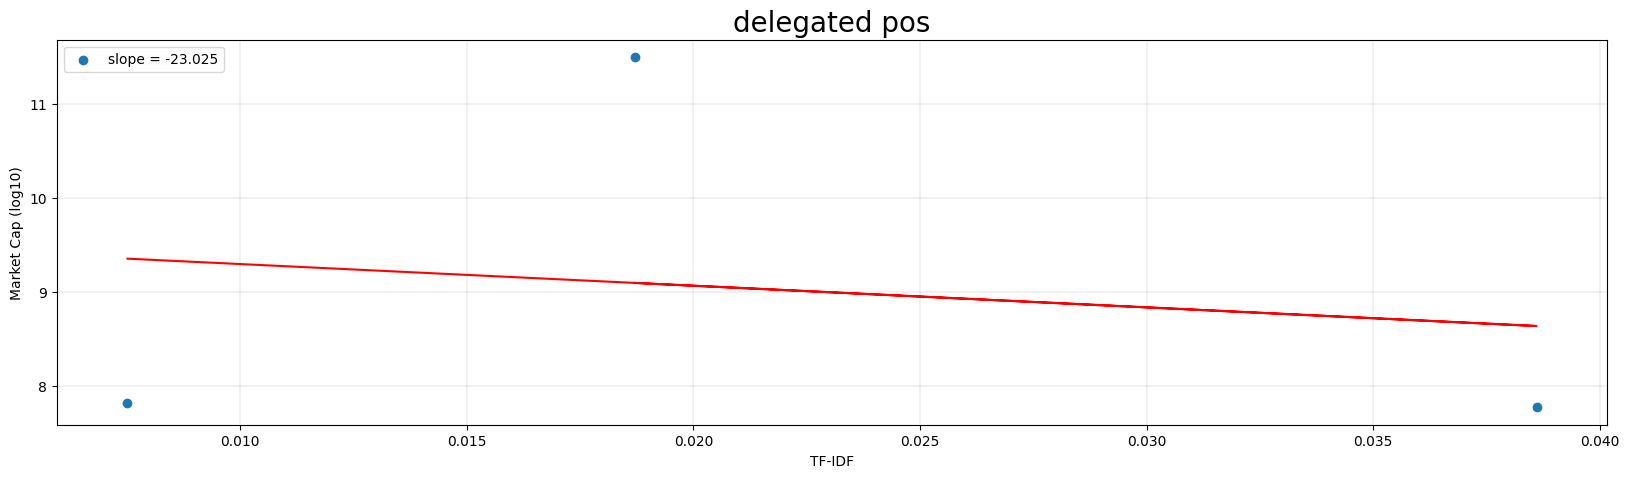

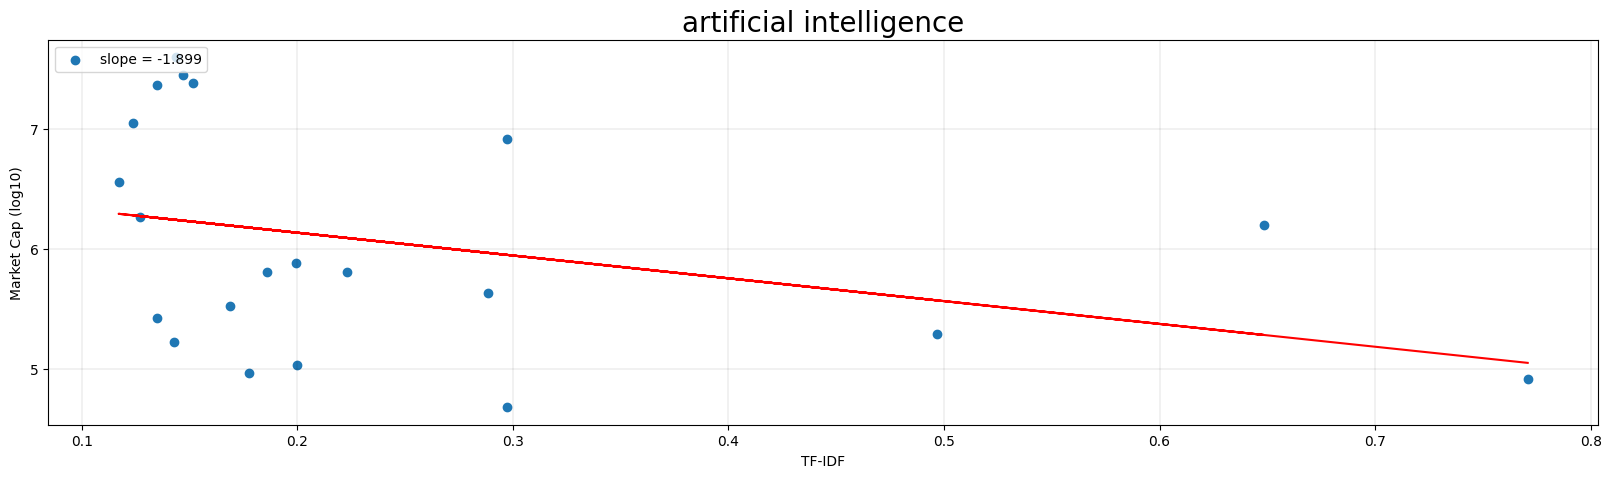

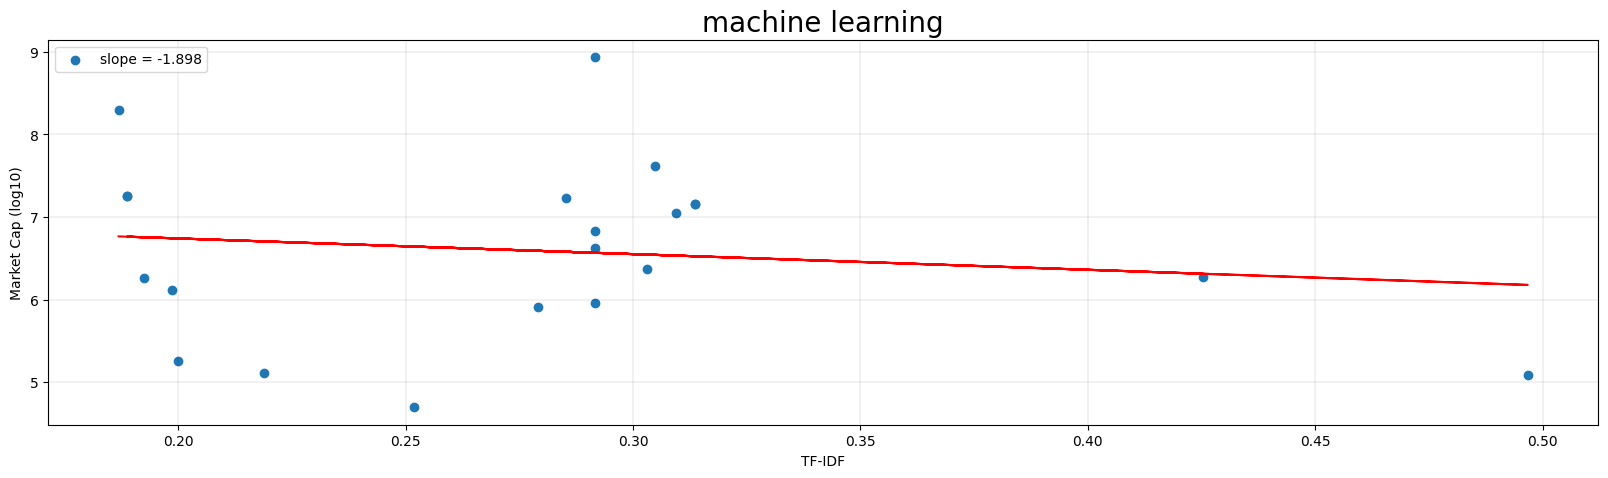

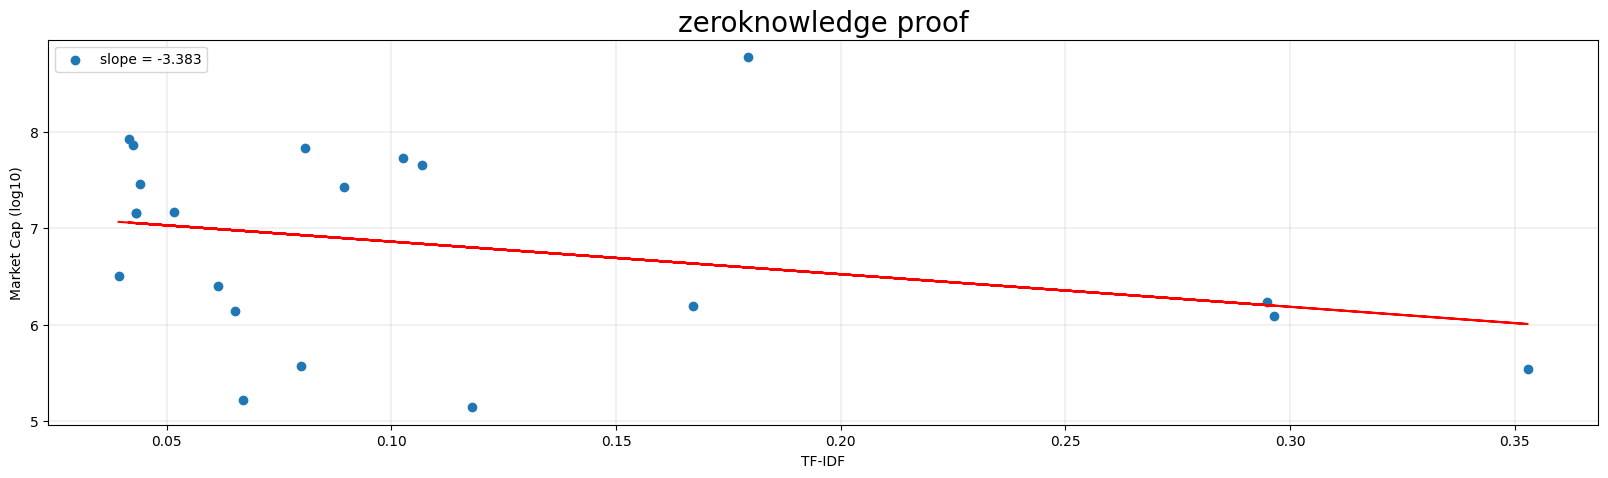

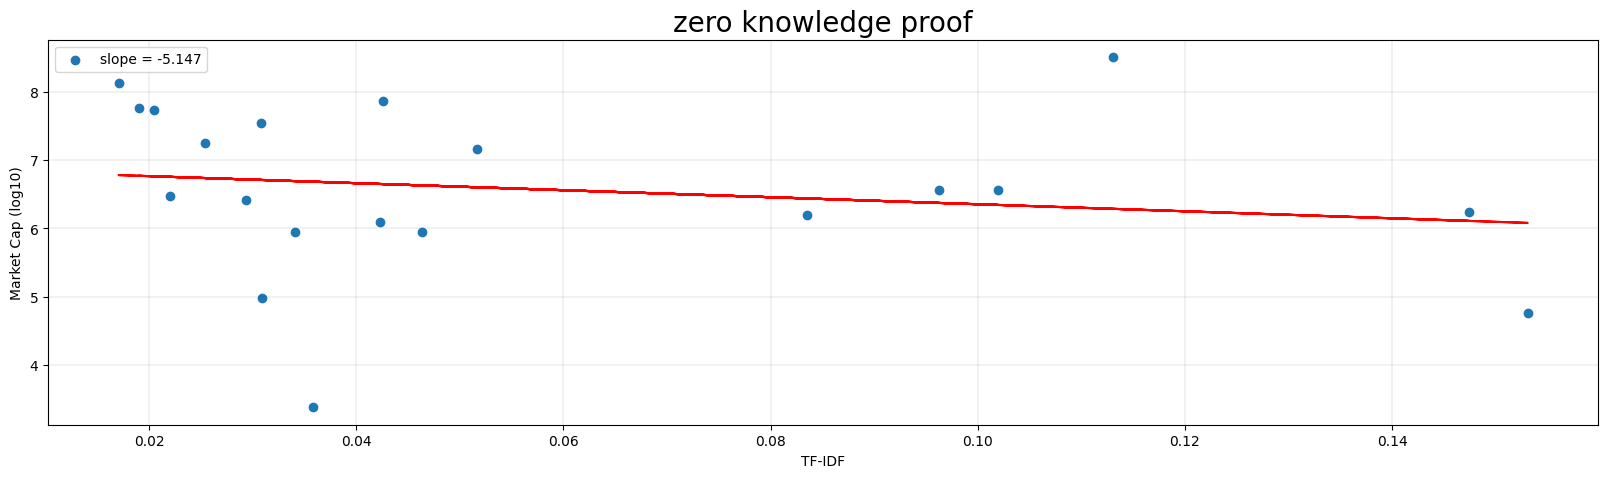

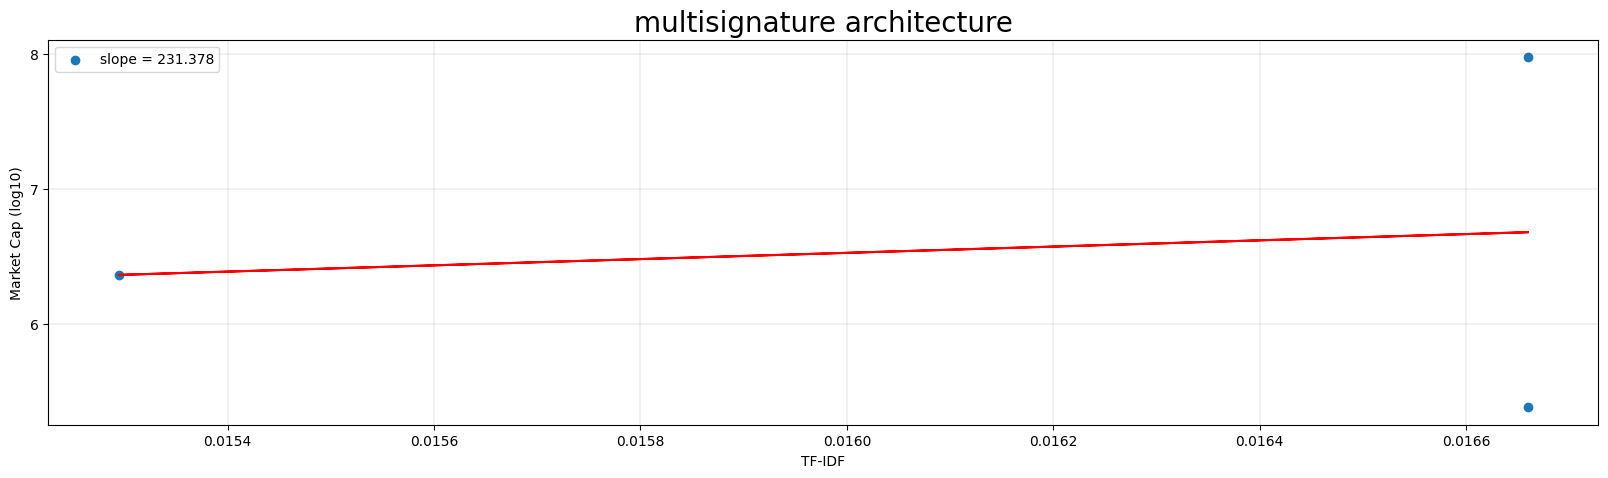

multi signature architecture is not good for visualization


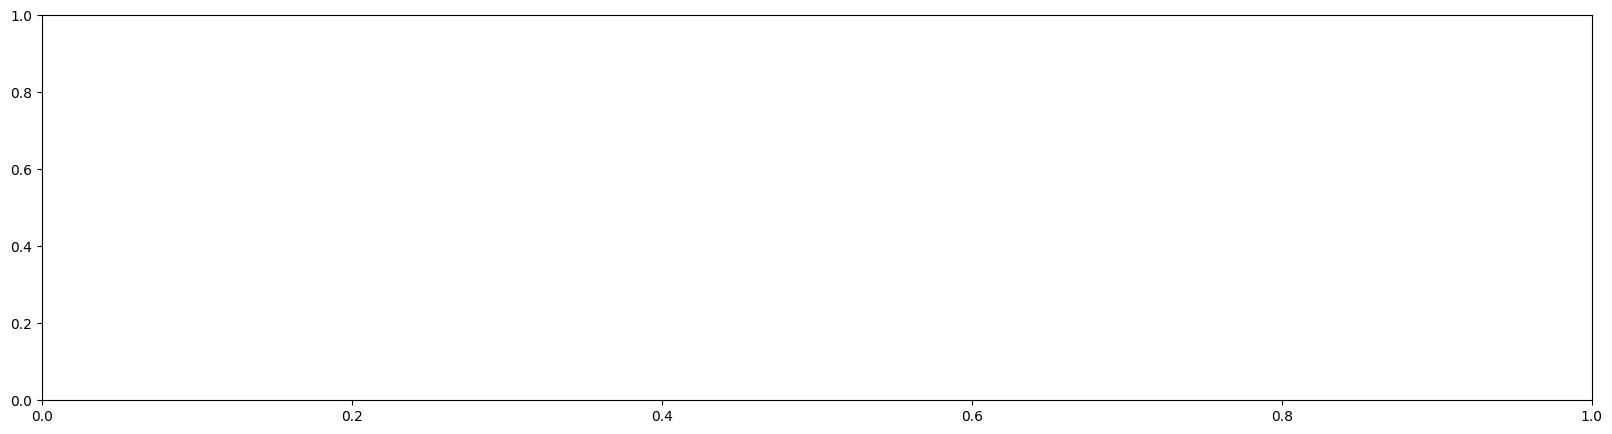

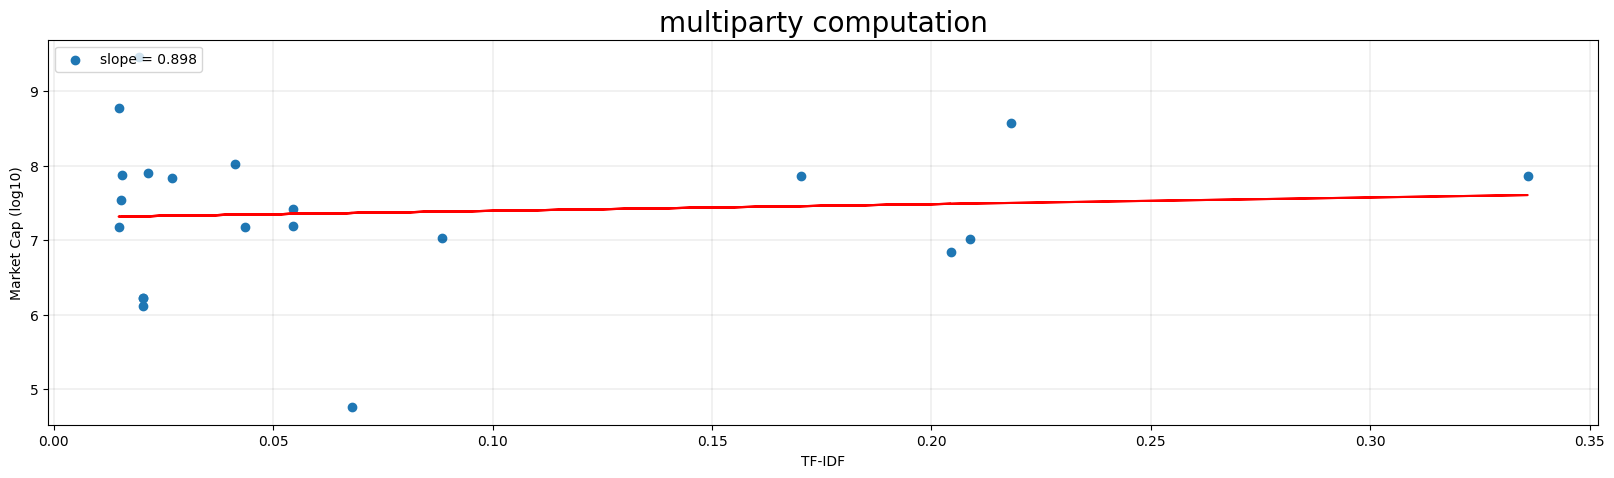

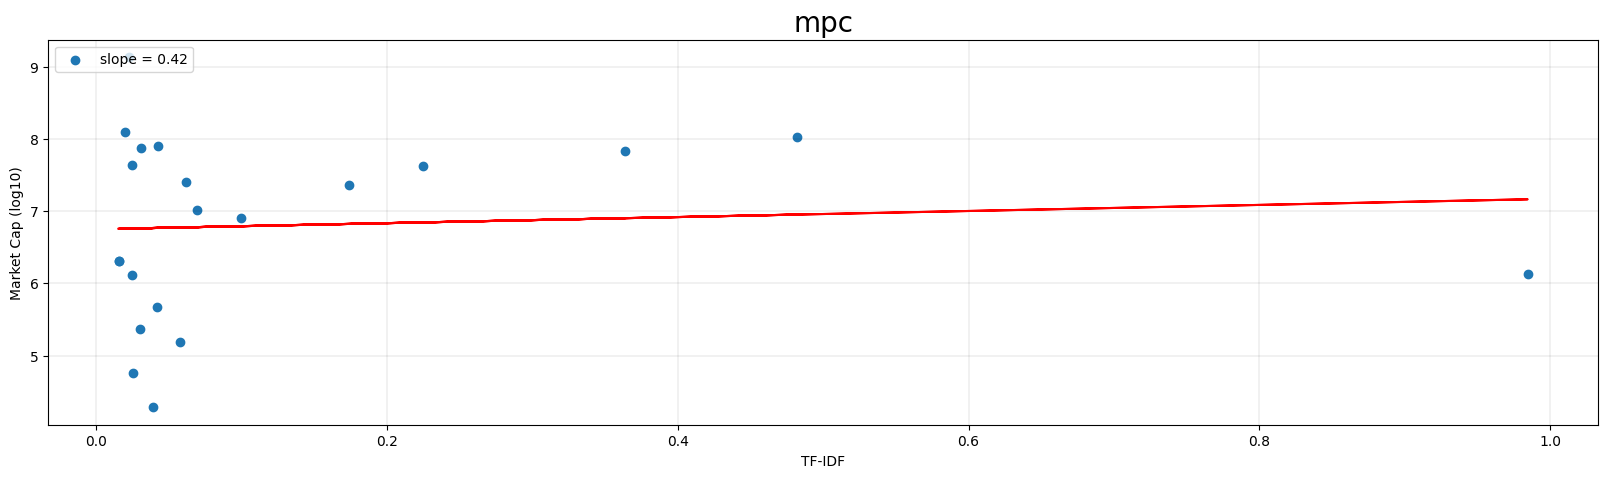

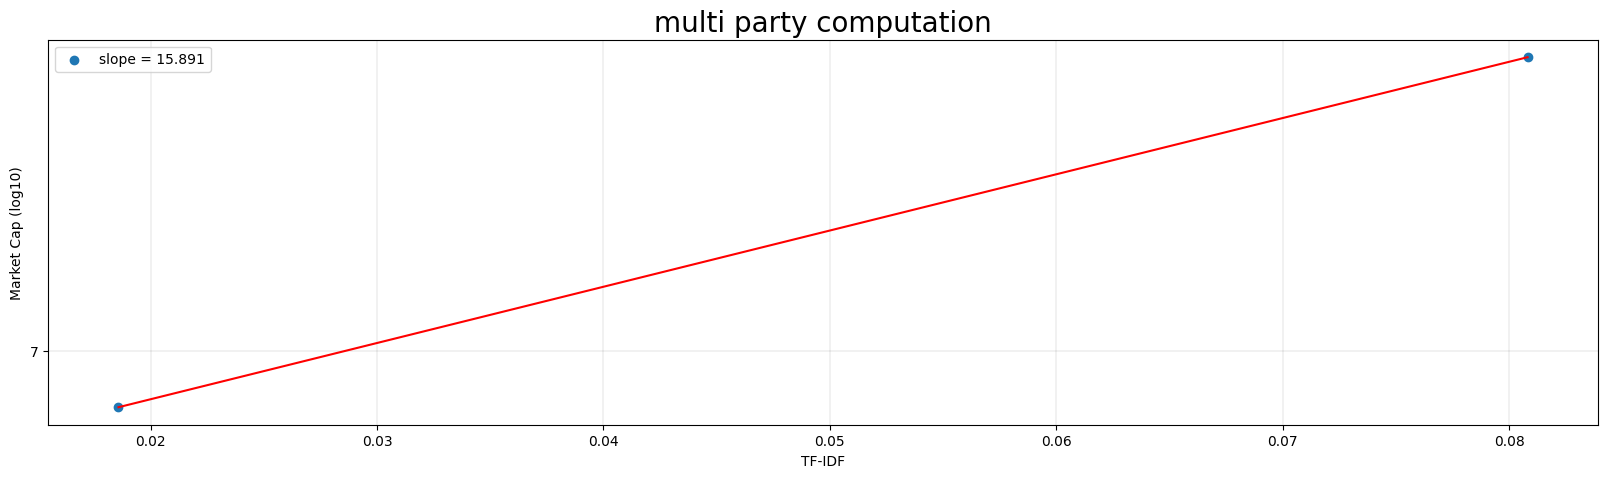

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


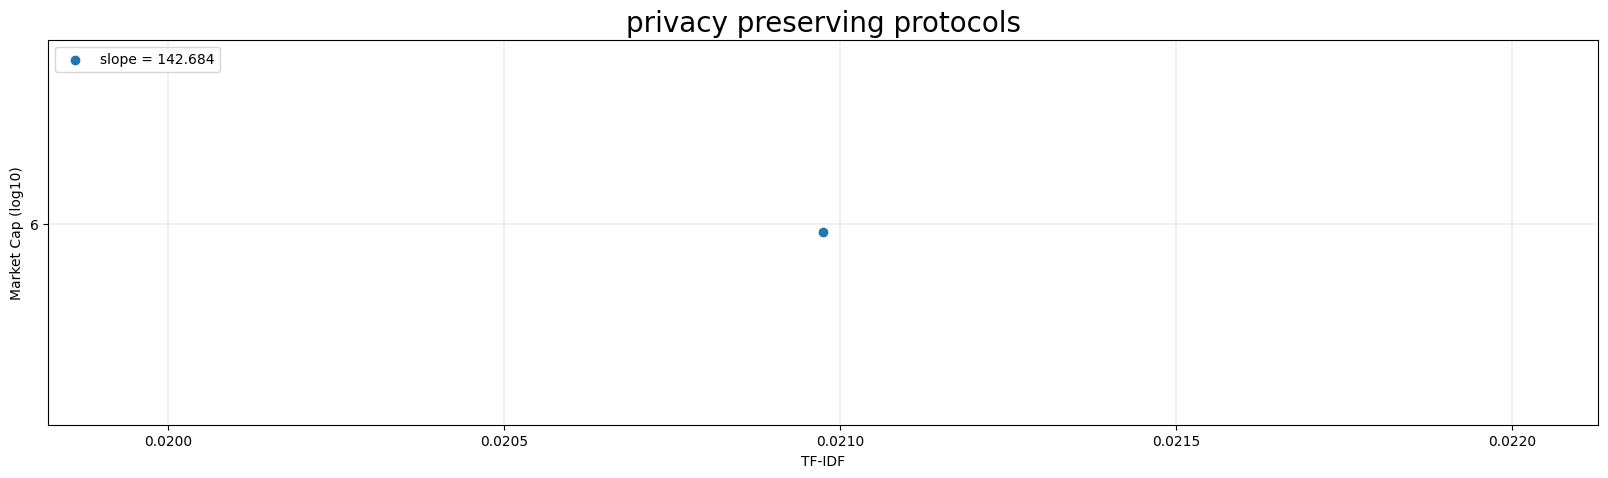

privacypreserving protocols is not good for visualization


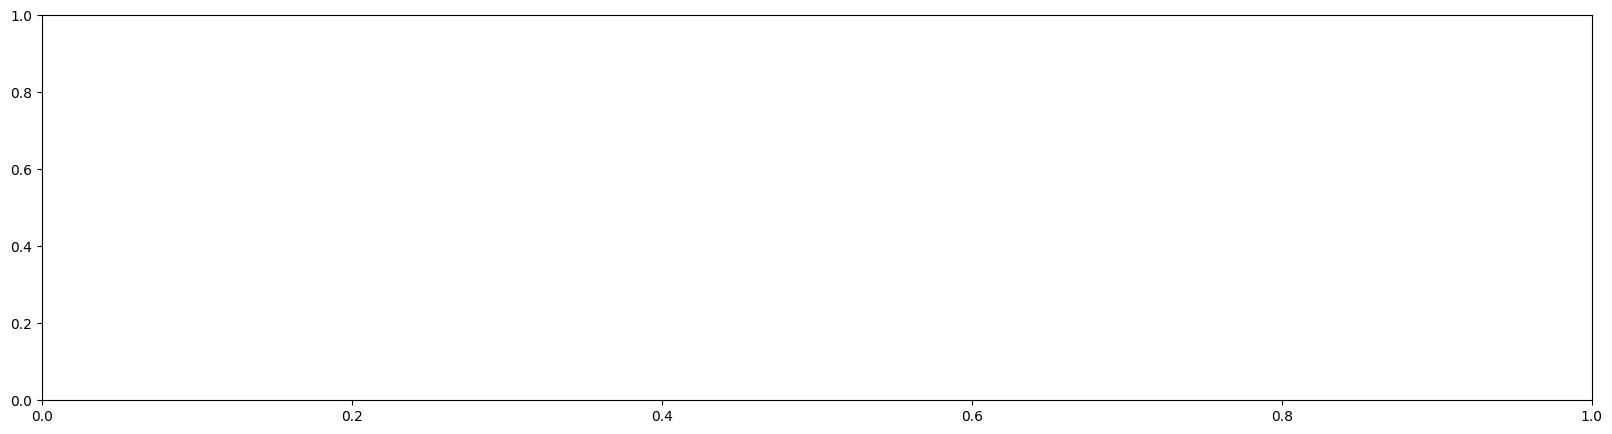

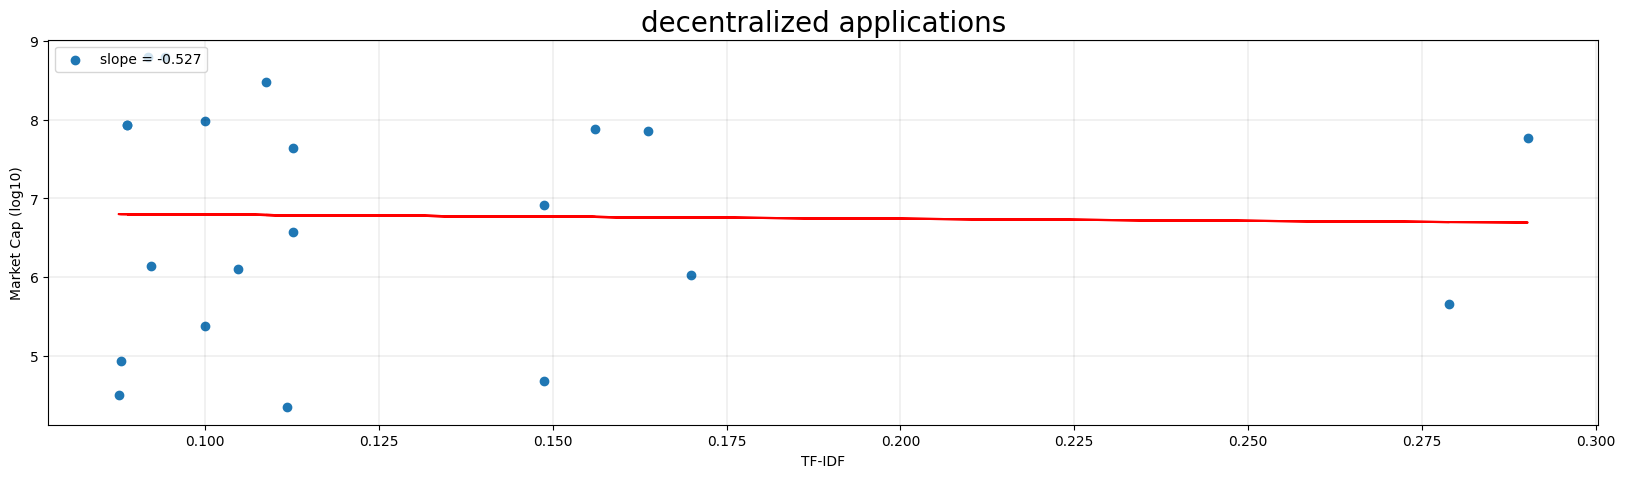

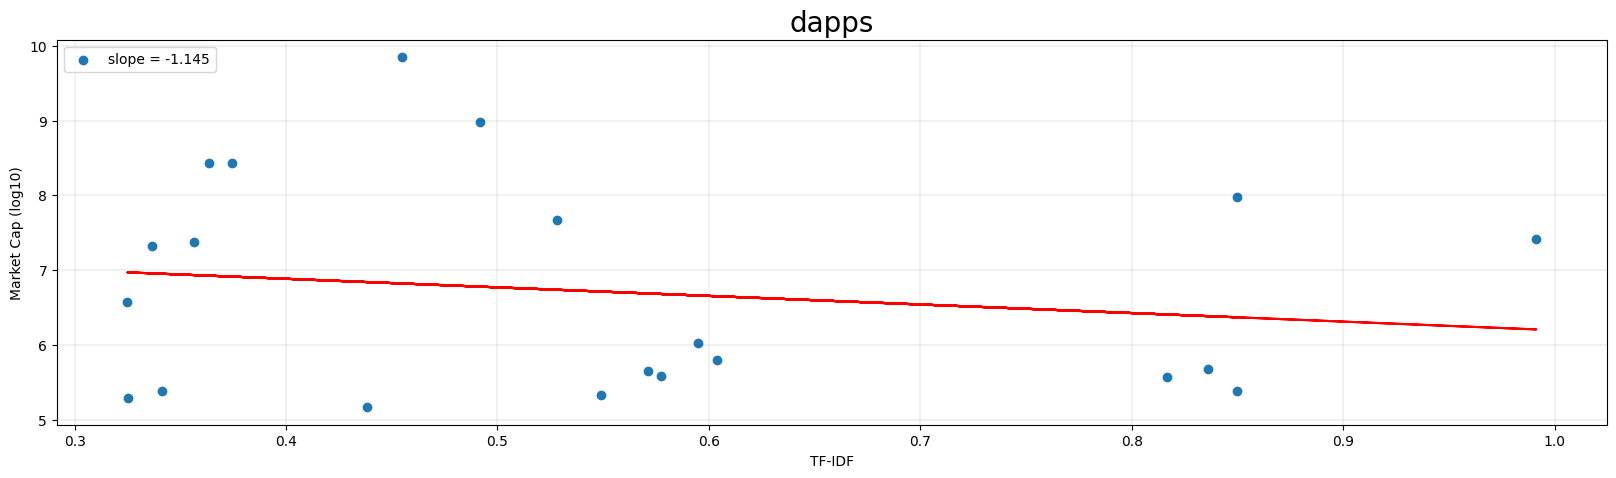

In [13]:
for i in all_df.columns[3:]:
    
    top_2 = all_df[i].quantile(0.98)
    top_df = all_df[all_df[i] > top_2]
    fig = plt.figure(figsize=(20,5))
    fig.add_subplot(111)

    try:
        x = top_df[i]
        y=np.log10(top_df.market_cap)
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        plt.scatter(x, y)

        plt.title(f'{i}', fontsize = 20)
        plt.xlabel('TF-IDF')
        plt.ylabel('Market Cap (log10)')

        plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
        plt.grid(color='black', linestyle='-', linewidth=0.08)
        plt.plot(x,p(x),"r-")

        #slope in the legend
        plt.legend([f'slope = {round(z[0], 3)}'], loc='upper left')

        # plt.xticks([0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008])
        # plt.hlines(y = 5, xmin = 0, xmax = 13, colors= 'black')
        # plt.vlines(x = 5, ymin = 0, ymax = 13, colors= 'black')
        plt.show()
    except Exception:
        print(f'{i} is not good for visualization')

# Regression

In [14]:
top_2 = all_df['smart contract'].quantile(0.98)
top_df = all_df[all_df['smart contract'] > top_2]
X = top_df['smart contract'].values.reshape(-1,1)
y = np.log10(top_df.market_cap).values.reshape(-1,1)
lm = LinearRegression().fit(X, y)
lm.score(X, y)

0.1527863205377339

In [15]:
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard_Errors"],myDF3["t_Value"],myDF3["P_Value"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard_Errors  t_Value  P_Value
0       -0.7451            3.620   -0.206    0.839
1        7.5326            4.069    1.851    0.080


In [16]:
new_list = []
for i in all_df.columns[3:]:
    
    top_2 = all_df[i].quantile(0.98)
    top_df = all_df[all_df[i] > top_2]

    try:
        X = top_df[i].values.reshape(-1,1)
        y = np.log10(top_df.market_cap).values.reshape(-1,1)


        lm = LinearRegression().fit(X, y)
        lm.score(X, y)
        params = np.append(lm.intercept_,lm.coef_)
        predictions = lm.predict(X)
        newX = np.append(np.ones((len(X),1)), X, axis=1)
        MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
        var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
        sd_b = np.sqrt(var_b)
        ts_b = params/ sd_b
        p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

        sd_b = np.round(sd_b,3)
        ts_b = np.round(ts_b,3)
        p_values = np.round(p_values,3)
        params = np.round(params,4)

        params, sd_b, ts_b, p_values = params[1],sd_b[1],ts_b[1],p_values[1]

    except Exception:
        # myDF3["Coefficients"],myDF3["Standard_Errors"],myDF3["t_Value"],myDF3["P_Value"] = ['-','-','-','-']
        params,sd_b,ts_b,p_values = [np.NaN,np.NaN,np.NaN,np.NaN]
        # pass
        # print(f'{i} is not good for regression')
    new_list.append([i, params,sd_b,ts_b,p_values])
myDF3 = pd.DataFrame(new_list, columns = ['Term','Coefficients','Standard_Errors','t_Value','P_Value'])

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_46818/3089715971.py:17: RuntimeWarning: divide by zero encountered in divide
  MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_46818/3089715971.py:17: RuntimeWarning: divide by zero encountered in divide
  MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [17]:
myDF3

,Term,Coefficients,Standard_Errors,t_Value,P_Value
0,blockchain,-10.1629,37.372,-0.272,0.789
1,smart contract,7.5326,4.069,1.851,0.080
2,proof work,NaN,NaN,NaN,NaN
3,proofofwork,5.1438,2.404,2.140,0.046
4,pow,-7.8572,6.169,-1.274,0.218
5,proof stake,NaN,NaN,NaN,NaN
6,proofofstake,-1.5204,1.352,-1.125,0.275
7,pos,228.2099,460.657,0.495,0.626
8,multisig,3.7423,1.617,2.314,0.032
9,hash rate,0.1892,4.987,0.038,0.970


In [18]:
final_df = myDF3.dropna(how='any')

In [19]:
final_df

,Term,Coefficients,Standard_Errors,t_Value,P_Value
0,blockchain,-10.1629,37.372,-0.272,0.789
1,smart contract,7.5326,4.069,1.851,0.080
3,proofofwork,5.1438,2.404,2.140,0.046
4,pow,-7.8572,6.169,-1.274,0.218
6,proofofstake,-1.5204,1.352,-1.125,0.275
7,pos,228.2099,460.657,0.495,0.626
8,multisig,3.7423,1.617,2.314,0.032
9,hash rate,0.1892,4.987,0.038,0.970
10,merkle tree,3.7608,1.392,2.702,0.015
11,side chain,3.6901,1.564,2.359,0.029


In [20]:
final_df.sort_values(by = 'Coefficients', ascending = False)

,Term,Coefficients,Standard_Errors,t_Value,P_Value
20,multisignature architecture,231.3782,1643.137,0.141,0.911
7,pos,228.2099,460.657,0.495,0.626
1,smart contract,7.5326,4.069,1.851,0.080
3,proofofwork,5.1438,2.404,2.140,0.046
10,merkle tree,3.7608,1.392,2.702,0.015
8,multisig,3.7423,1.617,2.314,0.032
11,side chain,3.6901,1.564,2.359,0.029
22,multiparty computation,0.8977,2.576,0.349,0.731
23,mpc,0.4203,1.256,0.335,0.741
9,hash rate,0.1892,4.987,0.038,0.970


In [21]:
final_df.sort_values(by = 'P_Value')

,Term,Coefficients,Standard_Errors,t_Value,P_Value
10,merkle tree,3.7608,1.392,2.702,0.015
11,side chain,3.6901,1.564,2.359,0.029
8,multisig,3.7423,1.617,2.314,0.032
3,proofofwork,5.1438,2.404,2.140,0.046
1,smart contract,7.5326,4.069,1.851,0.080
16,artificial intelligence,-1.8989,1.124,-1.690,0.107
18,zeroknowledge proof,-3.3826,2.351,-1.439,0.167
4,pow,-7.8572,6.169,-1.274,0.218
6,proofofstake,-1.5204,1.352,-1.125,0.275
13,multisig wallet,-3.5433,3.499,-1.013,0.324


In [22]:
new_list = []
for i in all_df.columns[3:]:
    
    top_2 = all_df[i].quantile(0.98)
    top_df = all_df[all_df[i] > top_2]

    try:
        x = top_df[i]
        y=np.log10(top_df.market_cap)
        reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
        # print(f'{i}: {reg.coef_} {reg.intercept_}')
    except Exception:
        pass
        # print(f'{i} is not good for regression')

    new_list.append([i, reg.coef_, reg.intercept_])

In [23]:
new_list

[['blockchain', array([[-10.1629112]]), array([16.13283531])],
 ['smart contract', array([[7.53260057]]), array([-0.74510033])],
 ['proof work', array([[7.53260057]]), array([-0.74510033])],
 ['proofofwork', array([[5.14383446]]), array([3.94535546])],
 ['pow', array([[-7.85716571]]), array([13.80746791])],
 ['proof stake', array([[0.]]), array([7.44974175])],
 ['proofofstake', array([[-1.5204497]]), array([7.08219088])],
 ['pos', array([[228.20987736]]), array([-220.878304])],
 ['multisig', array([[3.74228909]]), array([5.33272991])],
 ['hash rate', array([[0.18915545]]), array([6.57503674])],
 ['merkle tree', array([[3.76079033]]), array([6.23951447])],
 ['side chain', array([[3.69007726]]), array([5.85562612])],
 ['multicoin wallet', array([[-130.72044218]]), array([8.22754706])],
 ['multisig wallet', array([[-3.5433382]]), array([6.67781388])],
 ['delegated proof stake', array([[-3.5433382]]), array([6.67781388])],
 ['delegated pos', array([[-23.024632]]), array([9.52381192])],
 ['

In [24]:
df_reg = pd.DataFrame(new_list, columns=['term', 'coef', 'intercept'])
df_reg

,term,coef,intercept
0,blockchain,[[-10.162911195976779]],[16.13283530605995]
1,smart contract,[[7.532600568640295]],[-0.7451003303117867]
2,proof work,[[7.532600568640295]],[-0.7451003303117867]
3,proofofwork,[[5.143834458799091]],[3.9453554591896762]
4,pow,[[-7.857165708072701]],[13.807467912551935]
5,proof stake,[[0.0]],[7.449741750169486]
6,proofofstake,[[-1.5204497013931684]],[7.082190878692987]
7,pos,[[228.20987736484645]],[-220.87830400431454]
8,multisig,[[3.742289092991134]],[5.332729908402403]
9,hash rate,[[0.18915545093269456]],[6.575036743849612]


In [25]:
df_reg['coef'] = df_reg['coef'].apply(lambda x: x[0][0])
df_reg['intercept'] = df_reg['intercept'].apply(lambda x: x[0])

In [26]:
df_reg.sort_values(by='coef', ascending=False)

,term,coef,intercept
21,multi signature architecture,231.378179,2.826568
20,multisignature architecture,231.378179,2.826568
7,pos,228.209877,-220.878304
24,multi party computation,15.891413,6.546673
2,proof work,7.532601,-0.745100
1,smart contract,7.532601,-0.745100
3,proofofwork,5.143834,3.945355
10,merkle tree,3.760790,6.239514
8,multisig,3.742289,5.332730
11,side chain,3.690077,5.855626


# Multivariable LinReg

In [27]:
all_df.iloc[:, 3:]

,blockchain,smart contract,proof work,proofofwork,pow,proof stake,proofofstake,pos,multisig,hash rate,...,zero knowledge proof,multisignature architecture,multi signature architecture,multiparty computation,mpc,multi party computation,privacy preserving protocols,privacypreserving protocols,decentralized applications,dapps
1,0.800000,0.400000,0.0,0.0,0.000000,0.0,0.000000,0.400000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.609557,0.000000,0.0,0.0,0.270914,0.0,0.000000,0.745014,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.860313,0.282843,0.0,0.0,0.023570,0.0,0.035355,0.412479,0.070711,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.047140
7,0.904656,0.000000,0.0,0.0,0.069589,0.0,0.000000,0.417533,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034794,0.000000
9,0.432885,0.395243,0.0,0.0,0.037642,0.0,0.000000,0.809306,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.075617,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.932608,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1693,0.080178,0.187083,0.0,0.0,0.133631,0.0,0.053452,0.962140,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.026726
1694,0.836779,0.272863,0.0,0.0,0.018191,0.0,0.000000,0.472962,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1695,0.703508,0.137801,0.0,0.0,0.123295,0.0,0.000000,0.659992,0.000000,0.0,...,0.007253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021758,0.145053


In [28]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = all_df.iloc[:, 3:]
y = np.log10(all_df.market_cap)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             market_cap   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.153
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           0.000889
Time:                        15:25:17   Log-Likelihood:                -1780.6
No. Observations:                1027   AIC:                             3613.
Df Residuals:                    1001   BIC:                             3741.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [29]:
lst = []
for i in all_df.columns[3:]:
    try:
        top_2 = all_df[i].quantile(0.98)
        top_df = all_df[all_df[i] > top_2]

        X = top_df.iloc[:, 3:]
        y = np.log10(top_df.market_cap)

        slope, intercept, r_value, p_value, std_err = np.round(stats.linregress(x,y), 3)
        print(i, ': ', p_value)
    except Exception:
        slope, intercept, p_value = '-', '-', '-'
    lst.append([i, slope, intercept, p_value])

blockchain :  0.834
smart contract :  0.928
proofofwork :  0.221
pow :  0.297
pos :  0.541
multisig :  0.139
hash rate :  0.572
side chain :  0.699
multisig wallet :  0.4
artificial intelligence :  0.388
machine learning :  0.1
zeroknowledge proof :  0.355
multiparty computation :  0.386
mpc :  0.104
decentralized applications :  0.155
dapps :  0.473


In [30]:
df_lst = pd.DataFrame(lst, columns=['term', 'slope', 'intercept', 'p_value'])
df_lst

,term,slope,intercept,p_value
0,blockchain,-0.216,6.19,0.834
1,smart contract,-0.125,6.008,0.928
2,proof work,-,-,-
3,proofofwork,-2.643,8.081,0.221
4,pow,-2.121,7.879,0.297
5,proof stake,-,-,-
6,proofofstake,-,-,-
7,pos,1.342,6.392,0.541
8,multisig,2.517,5.108,0.139
9,hash rate,0.719,6.191,0.572


# Drop the bad terms

In [31]:
new_df = all_df.drop(columns=['proof work', 'proof stake', 'multicoin wallet', 'delegated proof stake',
                              'multi signature architecture', 'multi party computation', 'privacy preserving protocols', 'privacypreserving protocols', 'delegated pos',
                              'multisignature architecture'])

In [32]:
new_df

,Name,market_cap,volume_y,blockchain,smart contract,proofofwork,pow,proofofstake,pos,multisig,...,side chain,multisig wallet,artificial intelligence,machine learning,zeroknowledge proof,zero knowledge proof,multiparty computation,mpc,decentralized applications,dapps
1,Neural Protocol - Whitepaper,1.074150e+05,0.000000e+00,0.800000,0.400000,0.0,0.000000,0.000000,0.400000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,Idena - Whitepaper,7.561350e+05,2.432000e+04,0.609557,0.000000,0.0,0.270914,0.000000,0.745014,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0chain - Whitepaper,8.702623e+06,9.034700e+04,0.860313,0.282843,0.0,0.023570,0.035355,0.412479,0.070711,...,0.000000,0.011785,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.047140
7,SmartMesh - Whitepaper,1.243439e+06,5.655200e+04,0.904656,0.000000,0.0,0.069589,0.000000,0.417533,0.000000,...,0.000000,0.000000,0.034794,0.000000,0.000000,0.000000,0.0,0.0,0.034794,0.000000
9,Evedo - Whitepaper,1.834120e+05,6.310600e+04,0.432885,0.395243,0.0,0.037642,0.000000,0.809306,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,ZClassic - Whitepaper,3.467130e+05,2.500000e+01,0.075617,0.000000,0.0,0.000000,0.000000,0.932608,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.352879,0.000000,0.0,0.0,0.000000,0.000000
1693,Celo Dollar - Whitepaper,4.588473e+07,4.392350e+05,0.080178,0.187083,0.0,0.133631,0.053452,0.962140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.106904,0.000000,0.0,0.0,0.000000,0.026726
1694,Everex - Whitepaper,2.119030e+05,2.759000e+03,0.836779,0.272863,0.0,0.018191,0.000000,0.472962,0.000000,...,0.000000,0.000000,0.000000,0.036382,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1695,Cartesi - Whitepaper,6.410724e+07,4.180223e+06,0.703508,0.137801,0.0,0.123295,0.000000,0.659992,0.000000,...,0.007253,0.000000,0.000000,0.000000,0.014505,0.007253,0.0,0.0,0.021758,0.145053


In [33]:
X = new_df.iloc[:, 3:]
y = np.log10(new_df.market_cap)


lm = LinearRegression().fit(X, y)
lm.score(X, y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
sd_b = MSE
ts_b = params / sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard_Errors"],myDF3["t_Value"],myDF3["P_Value"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard_Errors  t_Value  P_Value
0         6.4277            1.933    3.325    0.001
1        -0.1404            1.933   -0.073    0.942
2        -0.1660            1.933   -0.086    0.932
3         0.7212            1.933    0.373    0.709
4         0.0064            1.933    0.003    0.997
5        -0.0201            1.933   -0.010    0.992
6         0.1998            1.933    0.103    0.918
7         1.7945            1.933    0.928    0.353
8         0.1102            1.933    0.057    0.955
9         4.7598            1.933    2.462    0.014
10        1.2876            1.933    0.666    0.506
11       -4.9528            1.933   -2.562    0.011
12       -2.0100            1.933   -1.040    0.299
13        0.6658            1.933    0.344    0.731
14       -0.6804            1.933   -0.352    0.725
15       -2.1536            1.933   -1.114    0.266
16        5.4617            1.933    2.825    0.005
17        0.7570            1.933    0.392    0.695
18        2.

In [34]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = new_df.iloc[:, 3:]
y = np.log10(new_df.market_cap)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             market_cap   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.302
Date:                Wed, 01 Mar 2023   Prob (F-statistic):            0.00122
Time:                        15:30:07   Log-Likelihood:                -1785.6
No. Observations:                1027   AIC:                             3611.
Df Residuals:                    1007   BIC:                             3710.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               